In [1]:
import tensorflow as tf

2025-08-27 17:32:55.895859: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-27 17:32:55.954809: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-27 17:32:57.406028: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras import layers, models

In [3]:
import numpy as np

In [4]:
import keras_tuner as kt

In [5]:
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# Define model builoder for keras tuner
def model_builder(hp):
    model = models.Sequential()

    # conv layer 1
    model.add(layers.Conv2D(
    filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
    kernel_size=(3,3),
    activation='relu',
    input_shape=(32,32,3)
    ))
    model.add(layers.MaxPooling2D(2,2))

    # Conv layer 2
    model.add(layers.Conv2D(
    filters=hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
    kernel_size=(3,3),
    activation='relu'
    ))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(
    units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
    activation='relu'
    ))

    # Dropout
    model.add(layers.Dropout(rate=hp.Float('dropout',  0.2, 0.5, step=0.1)))

    # Outputcan you also help me finding the loss and other parameters for the code. (and graphs if possible)
    model.add(layers.Dense(10, activation='softmax'))

    
    # Define learning rate
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # model compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [10]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='cifar10_tuning'
)

Reloading Tuner from my_dir/cifar10_tuning/tuner0.json


In [11]:
# EarlyStopping Callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [12]:
# Run hyperparameter search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[stop_early])

In [13]:
# Get best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best conv_1_filters: {best_hps.get('conv_1_filters')}")
print(f"Best conv_2_filters: {best_hps.get('conv_2_filters')}")
print(f"Best dense_units: {best_hps.get('dense_units')}")
print(f"Best dropout rate: {best_hps.get('dropout')}")
print(f"Best learning_rate: {best_hps.get('learning_rate')}")

Best conv_1_filters: 96
Best conv_2_filters: 64
Best dense_units: 128
Best dropout rate: 0.2
Best learning_rate: 0.001


In [14]:
# Train the model with best Hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/home/user/miniconda3/envs/jupyter_gpu_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3671 - loss: 1.7247 - val_accuracy: 0.5712 - val_loss: 1.2077
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5784 - loss: 1.1847 - val_accuracy: 0.6374 - val_loss: 1.0448
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6508 - loss: 0.9980 - val_accuracy: 0.6272 - val_loss: 1.0640
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6779 - loss: 0.9190 - val_accuracy: 0.6933 - val_loss: 0.8826
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7083 - loss: 0.8284 - val_accuracy: 0.6837 - val_loss: 0.9034
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7270 - loss: 0.7636 - val_accuracy: 0.6999 - val_loss: 0.8668
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7437 - loss: 0.7200 - val_accuracy: 0.7129 - val_loss: 0.8424
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7561 -

In [15]:
# Evaluate an test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.7101 - loss: 0.8584
Test Accuracy: 0.7101
Test Loss: 0.8584


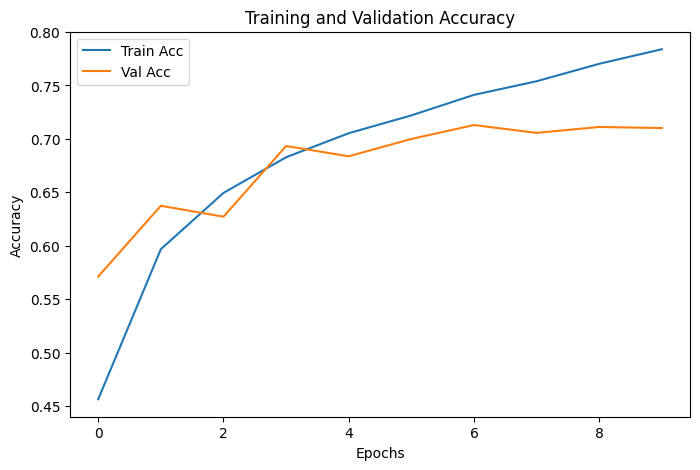

In [16]:
# Plotting Accuracy graph
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig("training_validation_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

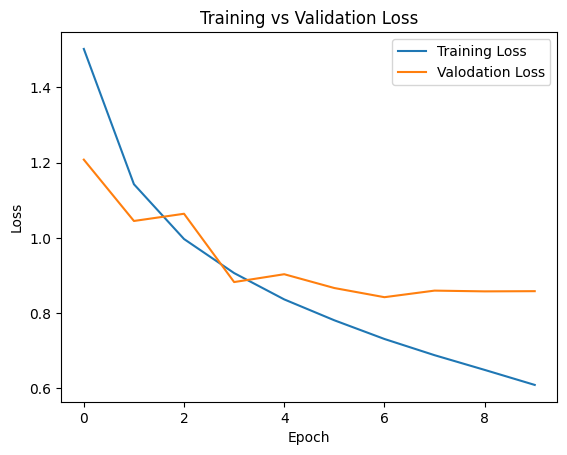

In [17]:
# Plotting the Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Valodation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.savefig("training_validation_loss.png", dpi=300, bbox_inches='tight')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


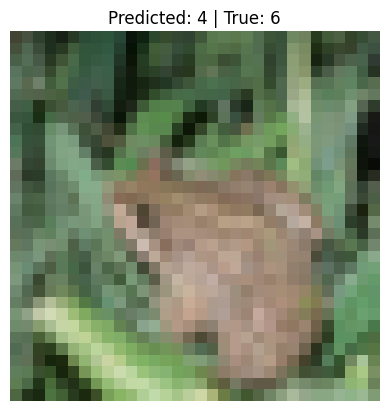

In [18]:
# Predications for the enitre dataset
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {np.argmax(predictions[i])} | True: {y_test[i]}")
    plt.axis('off')

In [19]:
# Get predictions for the whole test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


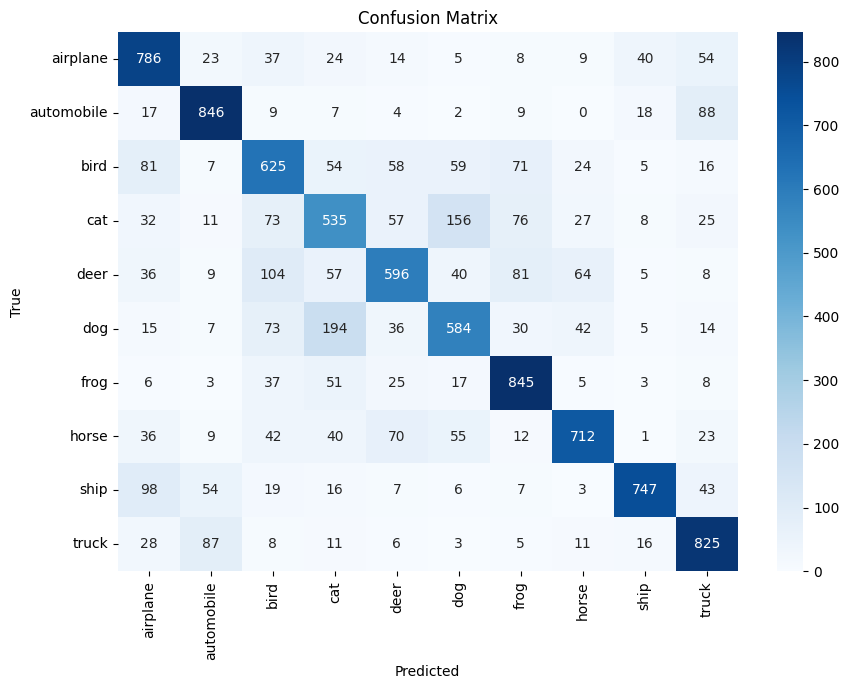

In [20]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# Predict probabilities for the entire test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [22]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    airplane       0.69      0.79      0.74      1000
  automobile       0.80      0.85      0.82      1000
        bird       0.61      0.62      0.62      1000
         cat       0.54      0.54      0.54      1000
        deer       0.68      0.60      0.64      1000
         dog       0.63      0.58      0.61      1000
        frog       0.74      0.84      0.79      1000
       horse       0.79      0.71      0.75      1000
        ship       0.88      0.75      0.81      1000
       truck       0.75      0.82      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

